# Hackathon

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
db_2011_12 = pd.read_sas('DIQ_G.XPT')
db_2013_14 = pd.read_sas('DIQ_H.XPT')
drugz = pd.read_csv('NSDUH-2014-DS0001-data-excel.tsv', sep='\t')

In [ ]:
db_2011_12.head()

In [43]:
drugz.head()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,II2EMST4,PRXRETRY,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,GQTYPE2
0,1,85314767,1,99,99,16,9999,99,4,93,...,1,99,2,2,2,2,8587.828634,40025,2,-9
1,2,16240983,1,99,99,16,9999,99,1,1,...,1,99,1,1,2,2,4260.686570,40041,1,-9
2,3,95206287,2,99,99,991,9991,91,91,91,...,1,99,2,2,2,2,874.478772,40010,1,-9
3,4,91546127,2,99,99,991,9991,91,91,91,...,1,99,1,1,2,2,4816.381147,40019,2,-9
4,5,43902390,2,99,99,991,9991,91,91,91,...,1,99,1,1,2,2,18967.391778,40016,2,-9


In [74]:
less_drugs = drugz[['NMNGTHS2', 'MJYRTOT', 'HERYRTOT']]

In [75]:
less_drugs.columns = ['Hosp_days', 'MJ_days', 'HER_days']

In [76]:
less_drugs.tail()

,Hosp_days,MJ_days,HER_days
55266,999,991,991
55267,4,993,991
55268,999,993,991
55269,999,3,991
55270,1,991,991


In [77]:
def change(x):
    if x > 365:
        return 0
    return x

In [78]:
# Kill hos days error codes
less_drugs.Hosp_days = less_drugs.Hosp_days.apply(change)

In [81]:
# Kill MJ days error codes
less_drugs.MJ_days = less_drugs.MJ_days.apply(change)

In [80]:
# Kill HER days error codes
less_drugs.HER_days = less_drugs.HER_days.apply(change)

In [82]:
less_drugs.tail()

,Hosp_days,MJ_days,HER_days
55266,0,0,0
55267,4,0,0
55268,0,0,0
55269,0,3,0
55270,1,0,0


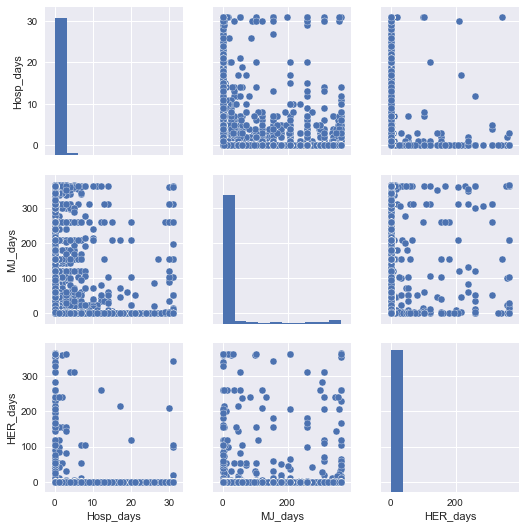

In [85]:
%matplotlib inline
sns.pairplot(less_drugs)


In [89]:
less_drugs.head()

,Hosp_days,MJ_days,HER_days
0,0,0,0
1,0,104,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
less_drugs['MJ_HER_interact'] = less_drugs['MJ_days'] *  less_drugs[ 'HER_days']

,Hosp_days,MJ_days,HER_days,MJ_HER_interact
0,0,0,0,0
1,0,104,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [96]:
X = less_drugs[['MJ_days', 'HER_days', 'MJ_HER_interact']]
X = sm.add_constant(X)

y = less_drugs['Hosp_days']

In [97]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)


# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Hosp_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.63
Date:                Mon, 31 Jul 2017   Prob (F-statistic):           4.53e-12
Time:                        15:36:34   Log-Likelihood:            -1.1595e+05
No. Observations:               55271   AIC:                         2.319e+05
Df Residuals:                   55267   BIC:                         2.319e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3457      0.009     39.577      0.000       0.329       0.363
MJ_days             0.0002      0.000      1.944      0.052   -1.91e-06       0.000
HER_days            0.0064      0.001      5.723      0.000       0.004       0.009
MJ_HER_interact -4.661e-06   5.64e-06     -0.827      0.408   -1.57e-05    6.39e-06
==============================================================================
Omnibus:                    86388.275   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39853502.751
Skew:                          10.209   Prob(JB):                         0.00
Kurtosis:                     132.956   Cond. No.                     2.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
less_drugs.to_csv('NSDUH-2014.csv')